3. Dado el siguiente grafo:\
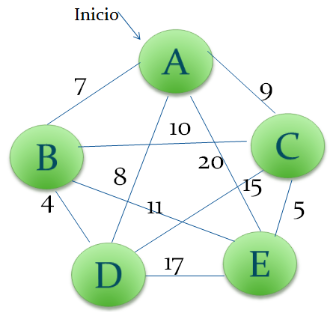\
Generar el archivo CSV, obtener el mejor recorrido usando algoritmos genéticos sin el uso de DEAP.

In [1]:
import numpy as np
import random

n_ciudades = 5
n_poblacion = 50
tasa_mutacion = 0.3

In [2]:
# Generación de una lista de coordenadas que representan cada ciudad
nombres_ciudades = np.array(['A', 'B', 'C', 'D', 'E'])
diccionario_ciudades = {'AB': 7, 'BA': 7, 'AC': 9, 'CA': 9, 'AD': 8, 'DA': 8, 'AE': 20, 'EA': 20, 'BC': 10, 'CB': 10,
                        'BD': 4, 'DB': 4, 'BE': 11, 'EB': 11, 'CD': 15, 'DC': 15, 'CE': 5, 'EC': 15, 'DE': 17, 'ED': 17}

In [3]:
# Función para calcular la distancia entre dos puntos
def calcular_distancia_ciudades_nombre(ciudad_a, ciudad_b, diccionario_ciudades):
    return diccionario_ciudades.get(ciudad_a + ciudad_b)

In [4]:
# Función para crear una población inicial de soluciones aleatorias
def poblacion_inicial(lista_ciudades, n_poblacion):
    poblacion = []
    for i in range(n_poblacion):
        solucion_i = lista_ciudades[np.random.choice(list(range(n_ciudades)), n_ciudades, replace=False)]
        poblacion.append(solucion_i)
    return np.array(poblacion)

poblacion = poblacion_inicial(nombres_ciudades, n_poblacion)
poblacion

array([['E', 'B', 'C', 'D', 'A'],
       ['A', 'C', 'B', 'D', 'E'],
       ['D', 'B', 'A', 'E', 'C'],
       ['D', 'B', 'A', 'C', 'E'],
       ['D', 'A', 'E', 'C', 'B'],
       ['D', 'C', 'B', 'E', 'A'],
       ['C', 'A', 'B', 'E', 'D'],
       ['B', 'E', 'C', 'A', 'D'],
       ['E', 'D', 'C', 'A', 'B'],
       ['C', 'A', 'D', 'B', 'E'],
       ['C', 'B', 'E', 'D', 'A'],
       ['E', 'D', 'C', 'B', 'A'],
       ['E', 'C', 'D', 'B', 'A'],
       ['C', 'A', 'D', 'E', 'B'],
       ['B', 'C', 'E', 'A', 'D'],
       ['C', 'E', 'D', 'A', 'B'],
       ['E', 'C', 'D', 'A', 'B'],
       ['B', 'A', 'C', 'D', 'E'],
       ['C', 'E', 'A', 'D', 'B'],
       ['B', 'E', 'C', 'D', 'A'],
       ['C', 'B', 'D', 'A', 'E'],
       ['D', 'A', 'B', 'E', 'C'],
       ['A', 'D', 'B', 'C', 'E'],
       ['C', 'D', 'A', 'E', 'B'],
       ['A', 'E', 'C', 'B', 'D'],
       ['D', 'B', 'A', 'E', 'C'],
       ['D', 'B', 'A', 'C', 'E'],
       ['C', 'E', 'B', 'D', 'A'],
       ['B', 'D', 'A', 'E', 'C'],
       ['B', '

In [5]:
# Función para evaluar la aptitud de una solución
def evaluar_aptitud(lista_ciudades, diccionario_ciudades):
    total = 0
    for i in range(n_ciudades - 1):
        a = lista_ciudades[i]
        b = lista_ciudades[i + 1]
        total += calcular_distancia_ciudades_nombre(a, b, diccionario_ciudades)
    total += calcular_distancia_ciudades_nombre(lista_ciudades[0], lista_ciudades[n_ciudades - 1], diccionario_ciudades)
    return total

In [6]:
# Función para obtener la aptitud de toda la población
def obtener_aptitudes(poblacion, diccionario_ciudades):
    aptitudes = np.zeros(n_poblacion)
    for i in range(n_poblacion):
        aptitudes[i] = evaluar_aptitud(poblacion[i], diccionario_ciudades)
    return aptitudes
aptitudes = obtener_aptitudes(poblacion, diccionario_ciudades)
aptitudes

array([64., 60., 61., 42., 57., 64., 59., 47., 59., 37., 55., 69., 61.,
       55., 47., 47., 56., 59., 47., 56., 47., 56., 47., 64., 57., 61.,
       42., 37., 57., 51., 59., 57., 47., 56., 47., 57., 69., 37., 47.,
       37., 37., 57., 56., 60., 64., 64., 55., 59., 52., 64.])

In [7]:
# Función para la selección de progenitores
def seleccionar_progenitores(poblacion, aptitudes):
    total_aptitudes = aptitudes.sum()
    probabilidades = aptitudes / total_aptitudes
    progenitores_a = np.random.choice(list(range(len(poblacion))), len(poblacion), p=probabilidades, replace=True)
    progenitores_b = np.random.choice(list(range(len(poblacion))), len(poblacion), p=probabilidades, replace=True)
    
    progenitores_a = poblacion[progenitores_a]
    progenitores_b = poblacion[progenitores_b]
   
    return np.array([progenitores_a, progenitores_b])

progenitores = seleccionar_progenitores(poblacion, aptitudes)
progenitores[0][0]

array(['B', 'C', 'E', 'A', 'D'], dtype='<U1')

In [8]:
# Función para el apareamiento de progenitores
def aparear_progenitores(prog_a, prog_b):
    descendencia = prog_a[0:5]
    for ciudad in prog_b:
        if not ciudad in descendencia:
            descendencia = np.concatenate((descendencia, [ciudad]))
    return descendencia

In [9]:
def aparear_poblacion(progenitores):
    nueva_poblacion = []
    for i in range(progenitores.shape[1]):
        prog_a, prog_b = progenitores[0][i], progenitores[1][i]
        descendencia = aparear_progenitores(prog_a, prog_b)
        nueva_poblacion.append(descendencia)       
    return nueva_poblacion

nueva_poblacion = aparear_poblacion(progenitores)
nueva_poblacion

[array(['B', 'C', 'E', 'A', 'D'], dtype='<U1'),
 array(['A', 'D', 'B', 'C', 'E'], dtype='<U1'),
 array(['B', 'D', 'A', 'E', 'C'], dtype='<U1'),
 array(['B', 'A', 'C', 'D', 'E'], dtype='<U1'),
 array(['B', 'A', 'C', 'D', 'E'], dtype='<U1'),
 array(['D', 'A', 'B', 'E', 'C'], dtype='<U1'),
 array(['B', 'D', 'A', 'E', 'C'], dtype='<U1'),
 array(['D', 'B', 'A', 'C', 'E'], dtype='<U1'),
 array(['D', 'C', 'B', 'A', 'E'], dtype='<U1'),
 array(['A', 'D', 'E', 'C', 'B'], dtype='<U1'),
 array(['D', 'A', 'B', 'E', 'C'], dtype='<U1'),
 array(['B', 'A', 'D', 'E', 'C'], dtype='<U1'),
 array(['B', 'C', 'A', 'E', 'D'], dtype='<U1'),
 array(['D', 'E', 'C', 'A', 'B'], dtype='<U1'),
 array(['E', 'C', 'D', 'B', 'A'], dtype='<U1'),
 array(['D', 'B', 'A', 'E', 'C'], dtype='<U1'),
 array(['A', 'C', 'B', 'E', 'D'], dtype='<U1'),
 array(['D', 'C', 'B', 'E', 'A'], dtype='<U1'),
 array(['B', 'C', 'A', 'E', 'D'], dtype='<U1'),
 array(['B', 'C', 'E', 'A', 'D'], dtype='<U1'),
 array(['E', 'D', 'C', 'B', 'A'], dtype=

In [10]:
# Función para realizar la mutación en una descendencia
def mutar_descendencia(descendencia):
    for q in range(int(n_ciudades * tasa_mutacion)):
        a = np.random.randint(0, n_ciudades)
        b = np.random.randint(0, n_ciudades)
        descendencia[a], descendencia[b] = descendencia[b], descendencia[a]
    return descendencia

In [11]:
# Función para realizar la mutación en toda la población
def mutar_poblacion(nueva_poblacion):
    poblacion_mutada = []
    for descendencia in nueva_poblacion:
        poblacion_mutada.append(mutar_descendencia(descendencia))
    return poblacion_mutada
poblacion_mutada = mutar_poblacion(nueva_poblacion)
poblacion_mutada

[array(['D', 'C', 'E', 'A', 'B'], dtype='<U1'),
 array(['A', 'D', 'B', 'E', 'C'], dtype='<U1'),
 array(['D', 'B', 'A', 'E', 'C'], dtype='<U1'),
 array(['D', 'A', 'C', 'B', 'E'], dtype='<U1'),
 array(['E', 'A', 'C', 'D', 'B'], dtype='<U1'),
 array(['E', 'A', 'B', 'D', 'C'], dtype='<U1'),
 array(['B', 'D', 'A', 'E', 'C'], dtype='<U1'),
 array(['C', 'B', 'A', 'D', 'E'], dtype='<U1'),
 array(['B', 'C', 'D', 'A', 'E'], dtype='<U1'),
 array(['A', 'D', 'C', 'E', 'B'], dtype='<U1'),
 array(['D', 'A', 'B', 'C', 'E'], dtype='<U1'),
 array(['B', 'C', 'D', 'E', 'A'], dtype='<U1'),
 array(['B', 'C', 'A', 'D', 'E'], dtype='<U1'),
 array(['D', 'E', 'A', 'C', 'B'], dtype='<U1'),
 array(['E', 'C', 'A', 'B', 'D'], dtype='<U1'),
 array(['D', 'B', 'A', 'E', 'C'], dtype='<U1'),
 array(['A', 'C', 'E', 'B', 'D'], dtype='<U1'),
 array(['D', 'C', 'B', 'E', 'A'], dtype='<U1'),
 array(['B', 'C', 'A', 'E', 'D'], dtype='<U1'),
 array(['B', 'D', 'E', 'A', 'C'], dtype='<U1'),
 array(['E', 'D', 'B', 'C', 'A'], dtype=

In [12]:
# Encontrar la mejor solución a través de la evolución de la población
#               iteracion costo solucion
mejor_solucion = [-1, np.inf, np.array([])]
for i in range(10000):
    aptitudes = obtener_aptitudes(poblacion_mutada, diccionario_ciudades)
    # Guardar la mejor solución
    if aptitudes.min() < mejor_solucion[1]:
        mejor_solucion[0] = i
        mejor_solucion[1] = aptitudes.min()
        mejor_solucion[2] = np.array(poblacion_mutada)[aptitudes.min() == aptitudes]
    
    if i % 100 == 0:
        #mostramos la iteracion, minimo, media
        print(i, aptitudes.min(), aptitudes.mean())
    
    progenitores = seleccionar_progenitores(poblacion, aptitudes)
    nueva_poblacion = aparear_poblacion(progenitores)   
    poblacion_mutada = mutar_poblacion(nueva_poblacion)
print(mejor_solucion)

0 37.0 57.12
100 37.0 57.82
200 37.0 53.1
300 42.0 56.0
400 37.0 55.18
500 37.0 55.72
600 37.0 54.12
700 37.0 54.3
800 42.0 55.7
900 37.0 54.72
1000 37.0 54.56
1100 37.0 55.36
1200 37.0 54.56
1300 37.0 53.52
1400 37.0 54.5
1500 37.0 55.82
1600 37.0 55.02
1700 42.0 55.4
1800 37.0 55.86
1900 37.0 54.62
2000 37.0 56.0
2100 37.0 54.96
2200 37.0 55.56
2300 37.0 52.32
2400 37.0 54.58
2500 37.0 52.62
2600 37.0 55.68
2700 37.0 56.1
2800 37.0 54.74
2900 37.0 55.76
3000 37.0 54.96
3100 37.0 55.7
3200 37.0 55.2
3300 37.0 54.42
3400 37.0 54.88
3500 42.0 55.88
3600 37.0 56.3
3700 37.0 54.5
3800 37.0 55.66
3900 37.0 54.72
4000 37.0 55.72
4100 37.0 54.18
4200 37.0 54.88
4300 37.0 55.28
4400 37.0 56.3
4500 37.0 55.06
4600 37.0 55.22
4700 37.0 56.44
4800 37.0 53.08
4900 37.0 51.84
5000 37.0 54.18
5100 37.0 53.78
5200 37.0 54.14
5300 37.0 55.8
5400 37.0 54.84
5500 37.0 55.14
5600 37.0 55.74
5700 37.0 55.84
5800 37.0 53.42
5900 37.0 56.48
6000 37.0 53.52
6100 37.0 54.12
6200 37.0 53.5
6300 37.0 55.86
640